Training data shape: (1176, 30)
Testing data shape: (294, 30)
Attrition balance in training set:
Attrition
0    0.838435
1    0.161565
Name: proportion, dtype: float64


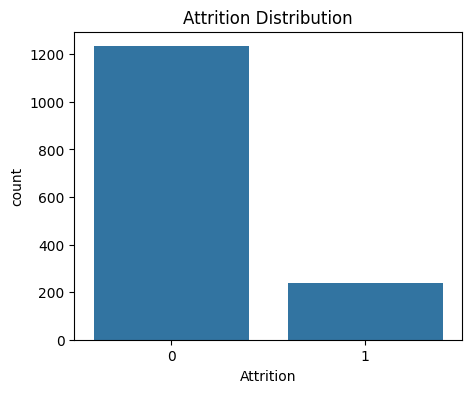

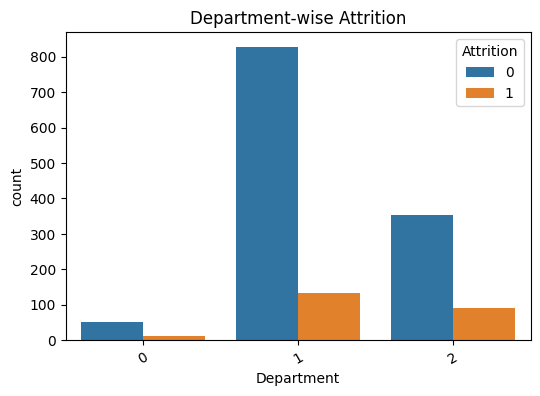

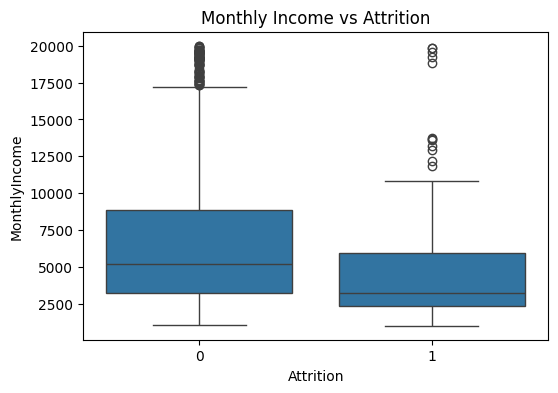

In [14]:
# Install dependencies if needed
# pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset (use the cleaned one if available)
df = pd.read_csv(r"C:\Kamil 2\HR-Employee-Attrition.csv")

# ----- Data Preparation -----

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Attrition balance in training set:")
print(y_train.value_counts(normalize=True))

# ----- Exploratory Data Analysis -----

# 1. Distribution of Attrition
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Attrition Distribution")
plt.show()

# 2. Department-wise Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department-wise Attrition")
plt.xticks(rotation=30)
plt.show()

# 3. Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


🔹 Logistic Regression Results (Scaled Data)
Accuracy: 0.8741496598639455

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



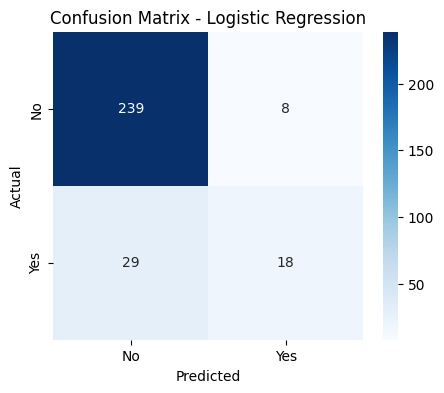

🔹 Decision Tree Results
Accuracy: 0.8435374149659864

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



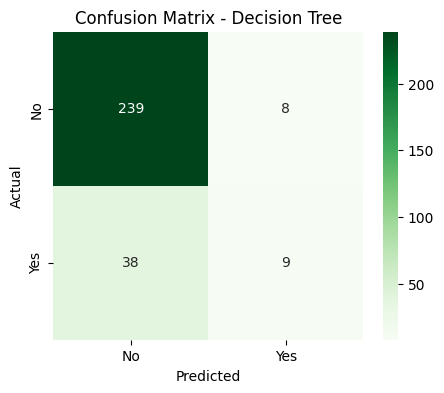

In [15]:
# Install dependencies if not already
# pip install scikit-learn matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# ----- Scale Data for Logistic Regression -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- Logistic Regression -----
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("🔹 Logistic Regression Results (Scaled Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----- Decision Tree (does not need scaling) -----
dt = DecisionTreeClassifier(random_state=42, max_depth=5)  # max_depth=5 to prevent overfitting
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔹 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


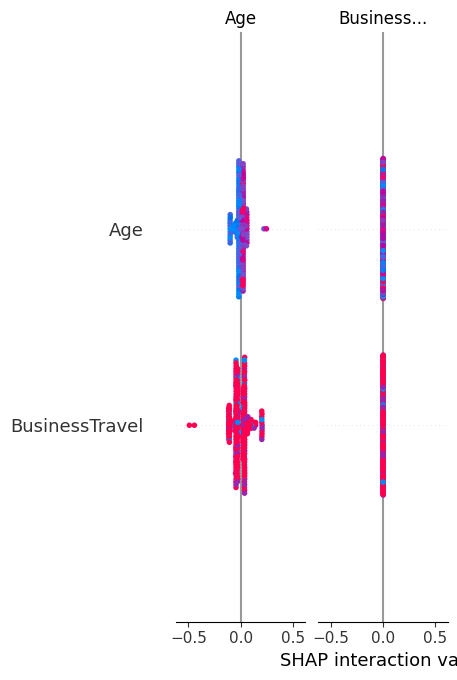

In [16]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [17]:
# Create a DataFrame with actual vs predicted results (from Decision Tree)
results = X_test.copy()
results["Actual_Attrition"] = y_test
results["Predicted_Attrition"] = y_pred_dt

# Map back encoded labels to original categories
results["Actual_Attrition"] = label_encoders["Attrition"].inverse_transform(results["Actual_Attrition"])
results["Predicted_Attrition"] = label_encoders["Attrition"].inverse_transform(results["Predicted_Attrition"])

# Save to CSV for Power BI
results.to_csv("Attrition_Predictions.csv", index=False)

print("✅ File saved as Attrition_Predictions.csv")


✅ File saved as Attrition_Predictions.csv
